### *“Nothing in life that’s worth anything is easy.”* -Barack Obama

----

YOUR NAME HERE:  Brandon Rank

----

# Lab J: Line Graphs!

---

### Visualization ###

Tables are a powerful way of organizing and visualizing data. However, large tables of numbers can be difficult to interpret, no matter how organized they are. Sometimes it is much easier to interpret graphs than numbers.

We now begin to develop some of the fundamental graphical methods of data analysis.

Now that we're moving on to visualization, we will need to import a third package besides ``numpy`` and ``pandas``.  Also, we'll use the style of graphs taken from the [538 website](https://fivethirtyeight.com/), which is a great website for very sound statistical analyses.  It's actually named after the number of electoral votes in the US.

In [ ]:
import numpy as np   #for processing arrays
import pandas as pd  #for processing dataframes
import sqlite3 as sql  #SQL!
import matplotlib.pyplot as plt #picture making!
plt.style.use('fivethirtyeight') #A helpful style package

### Setting up our data ###

In this lab, our source of data is the [Internet Movie Database](http://www.imdb.com), an online database that contains information about movies, television shows, video games, and so on. The site [Box Office Mojo](http://www.boxofficemojo.com) provides many summaries of IMDB data, some of which we have adapted. We have also used data summaries from [The Numbers](http://www.the-numbers.com), a site with a tagline that says it is "where data and the movie business meet."

Let's import the `movies_by_year.csv` file into a database that we can query with SQLite.  This table contains data on movies produced by U.S. studios in each of the years 1980 through 2015.

The columns are:

| **Column** | Content |
|------------|---------|
| `year` | Year |
| `total_gross` | Total domestic box office gross, in millions of dollars, of all movies released |
| `num_movies` | Number of movies released |
| `top_movie` | Highest grossing movie |

In [ ]:
try:
    #Read in the needed csvs and create the DB
    movies_by_year = pd.read_csv('movies_by_year.csv')
    conn = sql.connect('movies.db')
    movies_by_year.to_sql('movies', conn,  index = False)

except:

    print("Issue during DB creation/connection")

In [ ]:
sql_statement = """SELECT * FROM movies"""

movies_by_year = pd.read_sql_query(sql_statement, conn)
movies_by_year

,year,total_gross,num_movies,top_movie
0,2020,2085.9,329,Bad Boys for Life
1,2019,11320.8,792,Avengers: Endgame
2,2018,11889.3,873,Black Panther
3,2017,11072.8,740,Star Wars: The Last Jedi
4,2016,11377.1,737,Finding Dory
5,2015,11128.5,702,Star Wars: The Force Awakens
6,2014,10360.8,702,American Sniper
7,2013,10923.6,688,Catching Fire
8,2012,10837.4,667,The Avengers
9,2011,10174.3,602,Harry Potter / Deathly Hallows (P2)


---

## A Note on Terminology

A *variable* is a formal name for what we have been calling a "feature", such as 'number of movies.' The term *variable* emphasizes that the feature can have different values for different records.  For examples, the numbers of movies that occur each year varies across all the years, as does the #1 movie name in each year and the total gross of the movie.

Variables that have numerical values, such as 'number of movies' or 'total gross' are called *quantitative* or *numerical* variables.  On the other hand, variables that are not numerical are called *categorical* or *qualitative.*  For example, ``#1 Movie`` is a qualitative varible above.

# Line Graphs

Line graphs are among the most common visualizations and are often used to study chronological trends and patterns.  The x-axis and y-axis varaibles must both be numerical.

We already imported the matplotlib plotting library as ```plt```.  We'll rely on ```plt``` to make the visualizations.  The method ```plot``` from the ```plt``` package draws a line graph using one point for each row of the table.

Sensibly, you must pass these 2 pieces of information to the ``plot`` function:

* first give the column whose data will appear on the horizontal axis
* and then give the column whose data will appear on the vertical axis.

**IMPORTANT RULE:  For every graph we make in this class, please include a title and axes labels**

Here's how we can plot the number of movies (y) per year (x) and give it a title/labels.

Text(0, 0.5, 'Number of Movies')

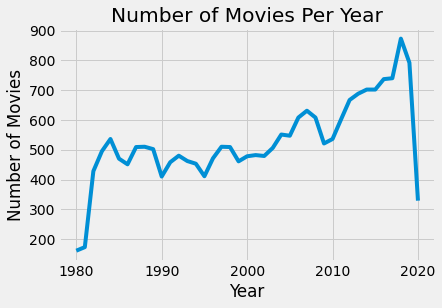

In [ ]:
#Run this cell after reading it
plt.plot(movies_by_year['year'], movies_by_year['num_movies'])  #Input the column for the horizontal data
                                                                #and then column for the vertical data
plt.title('Number of Movies Per Year')  #title
plt.xlabel('Year')                      #label x axis
plt.ylabel('Number of Movies')          #label y axis

If you wanted to show a point for every single (x,y) pair in the line graph, you could do so by adding the ```marker="o" ``` parameter below which tells matplotlib that you want a circle at each plotted point.

Be wary of doing this, however.  If it seems to  "clutter" the graph, the don't do it unless you have to, ie, unless your x axis datapoints have unequal intervals.

Text(0, 0.5, 'Number of Movies')

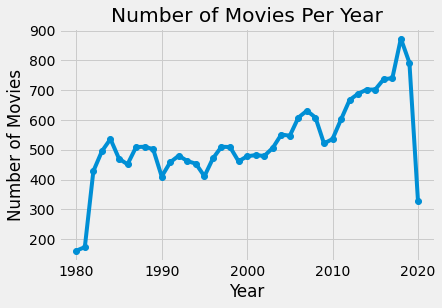

In [ ]:
#Run this cell after noting the difference with the previous code cell.
plt.plot(movies_by_year['year'], movies_by_year['num_movies'], marker='o')  #We added a marker parameter
plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

The graph rises sharply and then has a gentle upwards trend though the numbers vary noticeably from year to year. The sharp rise in the early 1980's is due in part to studios returning to the forefront of movie production after some years of filmmaker-driven movies in the 1970's.  And you know what the sharp decline in 2020 is from....

If desired, you can actually tweak the range of the x and y axis.  For example, even though though line graphs do not have to start at 0, let's say you wanted the y axis to go from 0-1000.  You can use the ``plt.ylim``  function to do this.

Fill in the ellipsis below to change the y axis range as desired.

(0.0, 1000.0)

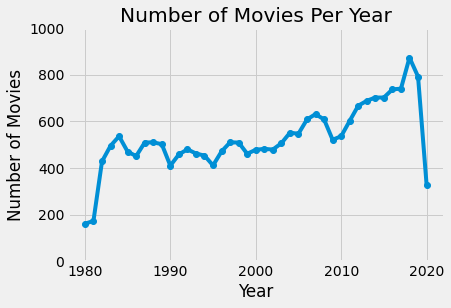

In [ ]:
#Run this cell after noting the difference with the previous code cell.
plt.plot(movies_by_year['year'], movies_by_year['num_movies'], marker='o')
plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.ylim(0, 1000)  #Fill in the ellipses with 0 and 1000 to chang

---

# **Question 1**

Our focus will be on more recent years.

In keeping with the theme of movies, generate a table corresponding just to the years 2000 through 2020 and call the table `century_21`.  (Notice the pun here.)

In [ ]:
#Create the century_21 table

sql_statement = """SELECT *
                   FROM movies
                   WHERE year BETWEEN 2000 AND 2020"""

century_21 = pd.read_sql_query(sql_statement, conn)  #Store the results into a variable called century_21
century_21

,year,total_gross,num_movies,top_movie
0,2020,2085.9,329,Bad Boys for Life
1,2019,11320.8,792,Avengers: Endgame
2,2018,11889.3,873,Black Panther
3,2017,11072.8,740,Star Wars: The Last Jedi
4,2016,11377.1,737,Finding Dory
5,2015,11128.5,702,Star Wars: The Force Awakens
6,2014,10360.8,702,American Sniper
7,2013,10923.6,688,Catching Fire
8,2012,10837.4,667,The Avengers
9,2011,10174.3,602,Harry Potter / Deathly Hallows (P2)


---

# Question 2

Let's create some line graphs from this data.

Now create a line plot of 'Year' vs 'Number of Movies' for the ``centure_21`` data.  Be sure to:

* Label the axes as Year and Number of Movies.
* Make sure each point on the line graph is visible.
* Entitle it `Number of Movies Created 2000-2020'.
* Give it a y axis range of 0 to 1200.

Text(0, 0.5, 'Number of Movies')

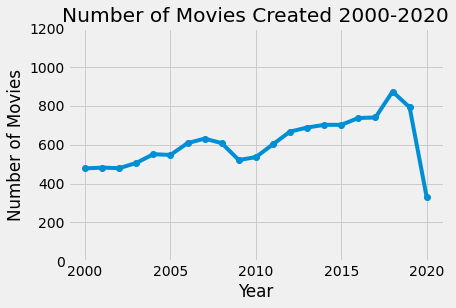

In [ ]:
#Create plot here with the desired specifications
plt.plot(century_21['year'], century_21['num_movies'], marker = 'o')
plt.title("Number of Movies Created 2000-2020")

plt.ylim(0,1200)
plt.xlabel("Year")
plt.ylabel("Number of Movies")

---

# Question 3

In the above graph, the global financial crisis of 2008 has a visible effect: In 2009 there is a sharp drop in the number of movies released.

The dollar figures, however, didn't suffer much.  To see this, now plot 'Year' vs 'Total Gross' for ``century_21`` data.  Be sure to:

* Label the X axis with "Year"
* Label the Y axis with "Total Gross (In Millions)"
* Make sure the dot for each data point is visible on the line graph.
* Entitle the whole graph `Total Movie Gross 2000-2020'
* Set the y axis range to go from 0 to 15000.

Text(0, 0.5, 'Total Gross (In Millions)')

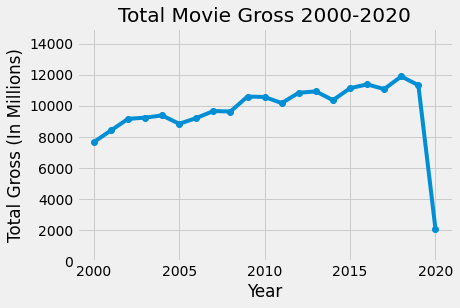

In [ ]:
#Create plot here with the desired specifications
plt.plot(century_21['year'], century_21['total_gross'], marker = 'o')
plt.title("Total Movie Gross 2000-2020")

plt.ylim(0,15000)
plt.xlabel("Year")
plt.ylabel("Total Gross (In Millions)")

---

From the last question, you just saw that the total domestic gross receipt was higher in 2009 than in 2008, even though there was a financial crisis and a much smaller number of movies were released.

One reason for this apparent contradiction is that people tend to go to the movies when there is a recession. According to a NYTimes article in Feb 2009, ["In Downturn, Americans Flock to the Movies,"](http://www.nytimes.com/2009/03/01/movies/01films.html?_r=0). The article quotes Martin Kaplan of the University of Southern California saying, "People want to forget their troubles, and they want to be with other people." When holidays and expensive treats are unaffordable, movies provide welcome entertainment and relief.

## Using ``.iloc``

Recall that the century_21 table looks like this (run the cell below).

In [ ]:
#run this cell
century_21.head(5)   #Using the head function to show only the first 5 rows.

,year,total_gross,num_movies,top_movie
0,2020,2085.9,329,Bad Boys for Life
1,2019,11320.8,792,Avengers: Endgame
2,2018,11889.3,873,Black Panther
3,2017,11072.8,740,Star Wars: The Last Jedi
4,2016,11377.1,737,Finding Dory


Sometimes we want create Python variables to store values from a table/dataframe.  We can do that by selecting the desired column and using ``iloc[x]``. Here, $x$ is the integer location (hence ``iloc``) of the value if we were to start counting from the first row at 0.  Here's some examples.

In [ ]:
#873 is at locatiion 2 from the top (329 is 0, 792 is 1, 873 is 2).

num_movies_2018 = century_21['num_movies'].iloc[2]
num_movies_2018  #Should be 873

873

In [ ]:
#11377.1 is the 4th value from the top in the total_gross col

total_gross_2016 = century_21['total_gross'].iloc[4]
total_gross_2016  #Should be 11377.1

11377.1

In [ ]:
#Bad Boys for Life is the top movie in the first (0th row)

top_movie_2020 = century_21['top_movie'].iloc[0]
top_movie_2020

'Bad Boys for Life'

---

# Question 4

In 2009, another reason for high box office receipts was the movie Avatar and its 3D release. Not only was Avatar the \#1 movie of 2009, it is also by some calculations the second highest grossing movie of all time.

A) First select the row with Avatar's info.  So the answer will be as follows.

|   | year | total_gross | num_movies | top_movie |
|--:|-----:|------------:|-----------:|----------:|
| 0 | 2009 | 10595.5     | 521        | Avatar    |

In [ ]:

sql_statement = """ SELECT *
                    FROM movies
                    WHERE top_movie = 'Avatar' """

avatar = pd.read_sql_query(sql_statement, conn)  #Call the results avatar
avatar

,year,total_gross,num_movies,top_movie
0,2009,10595.5,521,Avatar


B)  Set the 2 variables below equal to year/total gross in which Avatar was the #1 Movie using ``iloc``.

In [ ]:
#Set the 2 variables

total_gross_avatar_year = avatar["total_gross"].iloc[0]

avatar_year = avatar["year"].iloc[0]

print("Avatar was number 1 in ",avatar_year,
       " and the total gross for all movies in that year was $", total_gross_avatar_year , " million.", sep='')

Avatar was number 1 in 2009 and the total gross for all movies in that year was $10595.5 million.


---

Let's close the movies database and start another.

In [ ]:
conn.close()

---

##  GameStop Database

Let's move on to another data set.

You may have heard that there was a controversy with GameStop Stock in 2021.  You can read aboout it [here.](https://abcnews.go.com/Business/gamestop-timeline-closer-saga-upended-wall-street/story?id=75617315)  

In a nutshell, Wall Street investors bet that GameStop's stock would crash.  Common folks retaliated against this idea, and this meant more stocks were being "shorted" by Wall Street investors than were available to buy.  This had the effect of driving the GameStop stock prices up very quickly, and those who "shorted" underwent a significant loss.  

Let's load in the GameStop stock data.  Stock data is often visualized with line graphs because we want to see how much stock values change over time.

**Notice in the cell below, we use a new parameter when loading in the data:**

 * ``parse_dates``: This parameter is set to a list of columns that are dates.  This will force pandas to recognize these columns as dates and not just as simple text.


In [ ]:
try:
    #Read in the needed csvs and create the DB
    game_stop = pd.read_csv("game_stop.txt", parse_dates=["Date"]) #Thanks to parse_Dates, the Date column
                                                               #is recognized as time and not just a string

except:

    print("Issue reading in gamestop data.")

---

# Question 5

A) Create a line plot of the closing prices each day.   

So plot 'Date' vs 'Close' for this data.  Be sure to:

* Label the X axis with "Date"
* Label the Y axis with "Closing Price"
* Entitle it `Game Stop - Closing Prices'

Text(0, 0.5, 'Closing Price')

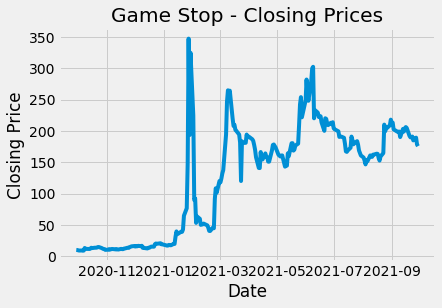

In [ ]:
#Create plot here with the desired specifications
plt.plot(game_stop['Date'], game_stop['Close'])
plt.title("Game Stop - Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")

B) Argh!  Ick!  Ack! Oook!  The x-axis labels are all jumbled together and this looks unprofessional, so we need to fix it.  

One way to fix this is to use ``plt.figsize`` to make the plot bigger.  

Copy and paste your code from part (A) into the following cell and insert th line below **AT THE TOP OF YOUR CELL.**  This line of code draws your graph with width 20 and height 5 so that the x axis elements are no longer squished together.

``plt.figure(figsize =(20,5))``


Text(0, 0.5, 'Closing Price')

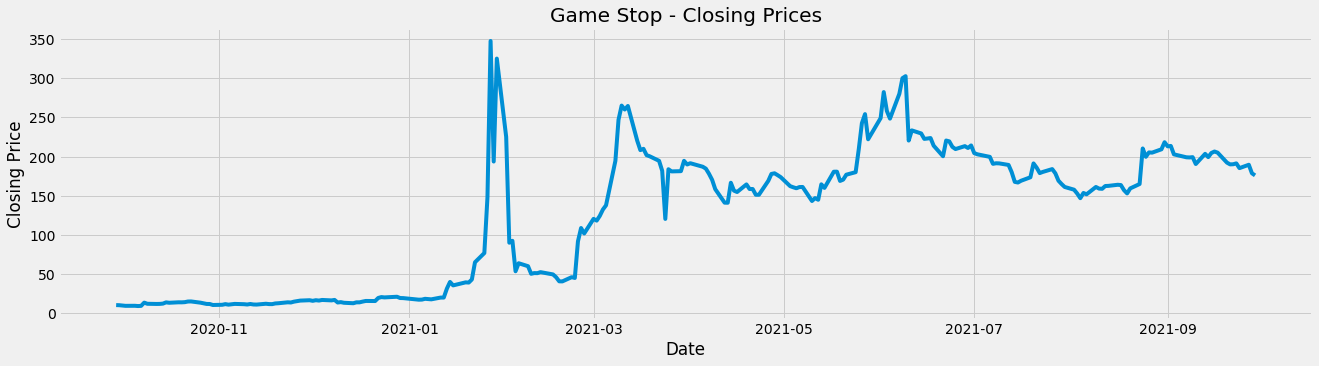

In [ ]:
#Copy and paste working code to part (a) and add the new line to spread out the x axis.
plt.figure(figsize =(20,5))
plt.plot(game_stop['Date'], game_stop['Close'])
plt.title("Game Stop - Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")


**C)** To fix the problem, we optionally could have just rotated the tick marks, say by 45 degrees. This will make them fit better on the x axis.

 Copy and paste your code FROM part (A) yet again into the following cell and add the following line anywhere you like.  

 * ``plt.xticks(rotation=45)  #You could rotate anywhere between 45 and 90 degrees ``

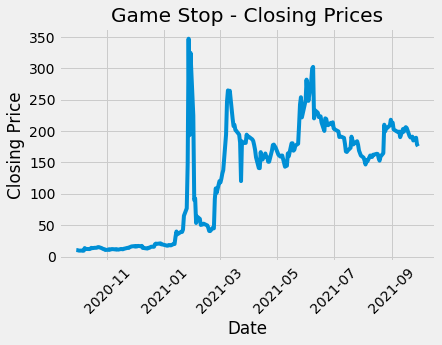

In [ ]:
#Copy and past working code to part (b) and add the new line to spread out the x axis.
plt.xticks(rotation=45) #You could rotate anywhere between 45 and 90 degrees
plt.plot(game_stop['Date'], game_stop['Close'])
plt.title("Game Stop - Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price");

**HELPFUL HINT:** Did your code print out a bunch of unwanted text above the image?

If so, add a semicolon at the end of your last line and re-run.  The text should disappear.  That should always do the trick.

If it did not, call me over.


---

###  Interpreting the Line Graph

The line graph for the closing stock prices is clearly low to start, showing the sock prices for GameStop were well under $50.

Then there is an unexpected spike towards the end of January 2021.  That is when the controversy that drove up Game Stop prices occured.

Furthermore, we see that every since the time of the controversy, GameStop stock has held its own, staying at least \$100 above where it was before the controversy.

---

# **Question 6**

Let's say that we just wanted to plot how much the stock changed on each day (so the Closing Stock Value - the Opening Stock Value).  

First, create a new column in the database called ``Net Change`` that is the difference of the previous 2 columns.  (Here, you are using Python, not SQL.)

Then plot the "Date" by the "Net Change" and be sure to:

* Give the graph titles and x/y labels
* Set the range of the y axis from -100 to 100
* Make the Figure Size 20 by 5


(-100.0, 100.0)

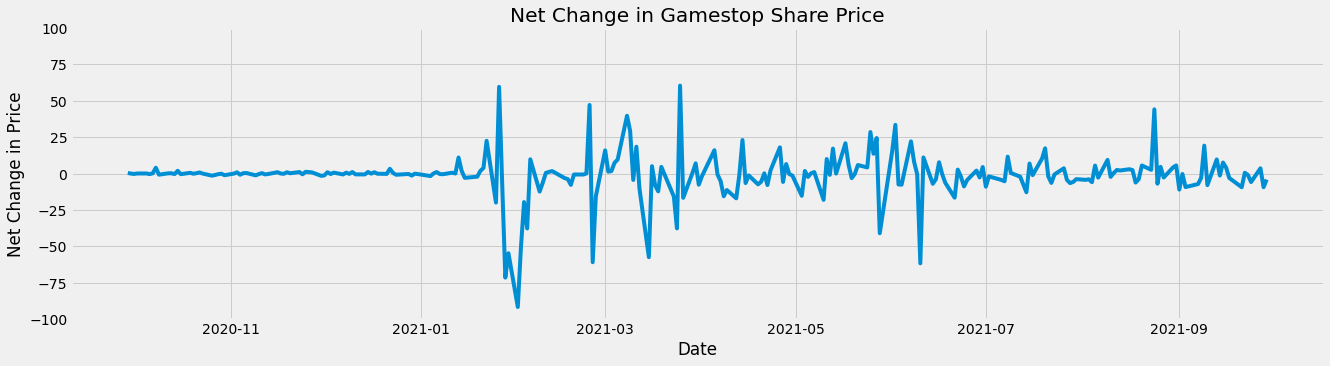

In [ ]:
#Work here
game_stop['Net Change'] = game_stop['Close'] - game_stop['Open']
game_stop

plt.figure(figsize = (20,5))
plt.plot(game_stop['Date'], game_stop['Net Change'])
plt.title('Net Change in Gamestop Share Price')
plt.xlabel('Date')
plt.ylabel('Net Change in Price')
plt.ylim(-100,100)


---

Huzzah!  You're done!  

Submit and then bask in glory, knowing that you can make visualizations in Python.  

You're one of only a few people who can on campus - Go you!